# Q1) Implementing Gaussian Elimination Method

(i) Find the approximate time your computer takes for a single addition by adding first $10^6$ positive integers
    using a for loop and dividing the time taken by $10^6$. Similarly find the approximate time taken for a
    single multiplication and division. Report the result obtained in the form of a table. (0.5)

    Deliverable(s): A tabular column indicating the time taken for each of the operations
------------------------------------------------------------------------------------------------------------------

In [1]:
import time
import sys
from math import log10 , floor, sqrt
import random

In [ ]:
# Addition Operation
start_time = time.time()
sum = 1
for x in range(2, 10**6 + 1):
    sum = sum + x
total_time = time.time() - start_time
print(f"Total time taken during all operations: {total_time} Seconds.")
print(f"Time taken during sigle operation: {total_time/10**6} Seconds.")

In [ ]:
# Multiplication Operation
start_time = time.time()
mul = 1
for x in range(2, 10**6 + 1):
    mul = mul * x
total_time = time.time() - start_time
print(f"Total time taken during all operations: {total_time} Seconds.")
print(f"Time taken during sigle operation: {total_time/10**6} Seconds.")

In [ ]:
# Division Operation
start_time = time.time()
div = 1
for x in range(2, 10**6 + 1):
    div = div / x
total_time = time.time() - start_time
print(f"Total time taken during all operations: {total_time} Seconds.")
print(f"Time taken during sigle operation: {total_time/10**6} Seconds.")

(ii) Write a function to implement Gauss elimination with and without pivoting. Also write the code to count the number
of additions, multiplications and divisions performed during Gaussian elimination. Ensure that the Gauss elimination 
performs 5S arithmetic which necessitates 5S arithmetic rounding for every addition, multiplication and division
performed in the algorithm. If this is not implemented correctly, the rest of the answers will be considered invalid.
Note that this is not same as simple 5 digit rounding at the end of the computation. Do not hardwire 5S arithmetic in
the code and use dS instead. The code can then be run with various values of d. (0.5 + 0.5)

    Deliverable(s): The code for the Gaussian elimination with and without partial pivoting with the rounding part
-----------------------------------------------------------------------------------------------------------------------

Therefore the total number of operations to obtain the solution of a system of n linear equations in n variables using Gaussian Elimination is:

TotalNumberofAdditions/SubtractionstoObtainSolution=$n(n−1)(2n+5)/6$

TotalNumberofMultiplications/DivisinonstoObtainSolution=$n(n^2+3n−1)/3$

In conclusion, solving Ax = b takes at most n(n + 1)/2 divisions, $(2n^3 + 3n^2 −5n)/6$ multiplications, and 
$(2n^3 + 3n^2 −5n)/6$ addition/subtractions.

http://web.mit.edu/18.06/www/Fall15/Matrices.pdf

In [ ]:
def gauss_elimination_without_pivoting(a, b, d):
    '''
    Gaussian elimination without pivoting.
    param: a is an n x n matrix
           b is an n x 1 vector
           d is significant digit
    return: x is the solution of Ax=b. 
    '''
    n = len(a)
    x = [0 for i in range(n)]
    
    # Apply forward elimination
    for i in range(n-1):
        # Check for leading element as non-zero
        if a[i][i] == 0:
            sys.exit("Triangle leading element zero detected, Division by Zero Error!")
        for j in range(i+1, n):
            multiplier = a[j][i] / a[i][i]
            # Apply row operation on matrix a
            a[j][i] = 0
            for col in range(i+1, n):
                a[j][col] = a[j][col] - multiplier * a[i][col]
            # Apply row operation on vector b
            b[j] = b[j] - multiplier * b[i]
    
    # Calculate rank of a
    rank = 0
    zero_rows_idx = []
    for r_idx in range(n):
        if any(a[r_idx]):
            rank = rank + 1
        else:
            zero_rows_idx.append(r_idx)

    if rank == n:
        # System has one unique solution
        # Apply back substitution
        x[n-1] = b[n-1] / a[n-1][n-1]
        for i in range(n-2, -1, -1):
            x[i] = b[i]
            for j in range(i+1, n):
                x[i] = x[i] - a[i][j]*x[j]
            x[i] = x[i] / a[i][i]
        return a, b, x
    else:
        # r < n, check if r+1, r+2, ... r+n rows in b has any non zero value
        for z_idx in zero_rows_idx:
            if b[z_idx] != 0:
                sys.exit("Incosistent system, there is no solution!")
        sys.exit("Consistent system, there may be infinitly many solutions!")

In [ ]:
# Test1
a = [[3.0,  2.0, -4.0],
     [2.0,  3.0,  3.0],
     [5.0, -3.0,  1.0]]
b = [3.0, 15.0, 14.0]
a, b, x = gauss_elimination_without_pivoting(a, b, 5)

print(f"A: {a}\nb: {b}\nx: {x}")

In [ ]:
# Test2
a = [[1.0,  1.0, 1.0],
     [2.0,  -3.0,  4.0],
     [3.0, 4.0,  5.0]]
b = [9.0, 13.0, 40.0]
a, b, x = gauss_elimination_without_pivoting(a, b, 5)

print(f"A: {a}\nb: {b}\nx: {x}")

In [ ]:
# Test3
a = [[2.0,  1.0, -1.0],
     [-3.0,  -1.0,  2.0],
     [-2.0, 1.0,  2.0]]
b = [8.0, -11.0, -3.0]
a, b, x = gauss_elimination_without_pivoting(a, b, 5)

print(f"A: {a}\nb: {b}\nx: {x}")

In [ ]:
# Test4 - No solution
a = [[2.0,  3.0],
     [2.0,  3.0]]
b = [10.0, 12.0]
a, b, x = gauss_elimination_without_pivoting(a, b, 5)

print(f"A: {a}\nb: {b}\nx: {x}")

In [ ]:
# Test5 - Infinetly many solutions
a = [[2.0,  3.0],
     [2.0,  3.0]]
b = [10.0, 10.0]
a, b, x = gauss_elimination_without_pivoting(a, b, 5)

print(f"A: {a}\nb: {b}\nx: {x}")

In [369]:
# With operation count & significant airthmatic
def gauss_elimination_without_pivoting(a, b, d):
    '''
    Gaussian elimination without pivoting.
    param: a is an n x n matrix
           b is an n x 1 vector
           d is significant digit
    return: x is the solution of Ax=b.
            row echelon form of a
            row echelon form of b
            addition, subtraction, multiply, divide operations count
    '''
    n = len(a)
    x = [0 for i in range(n)]
    add_ops_count, mul_ops_count, div_ops_count = 0, 0, 0
    
    # Significant digit conversion
    def tidy(x, sig):
        y = abs(x)
        if y <= sys.float_info.min:
            return 0.0000
        return round(x, sig-int(floor(log10(y)))-1)
    
    # Apply forward elimination
    for i in range(n-1):
        # Check for leading element as non-zero
        if a[i][i] == 0:
            sys.exit("Triangle leading element zero detected, Division by Zero Error!")
        for j in range(i+1, n):
            multiplier = tidy(a[j][i] / a[i][i], d)
            div_ops_count = div_ops_count + 1
            # Apply row operation on matrix a
            a[j][i] = tidy(0, d)
            for col in range(i+1, n):
                a[j][col] = tidy(a[j][col] - tidy(multiplier * a[i][col], d), d)
                add_ops_count = add_ops_count + 1
                mul_ops_count = mul_ops_count + 1
            # Apply row operation on vector b
            b[j] = tidy(b[j] - tidy(multiplier * b[i], d), d)
            add_ops_count = add_ops_count + 1
            mul_ops_count = mul_ops_count + 1
    
    # Apply back substitution
    # Calculate rank of a to check if unique solution is present
    rank = 0
    zero_rows_idx = []
    for r_idx in range(n):
        if any(a[r_idx]):
            rank = rank + 1
        else:
            zero_rows_idx.append(r_idx)

    if rank == n:
        # System has one unique solution
        x[n-1] = tidy(b[n-1] / a[n-1][n-1], d)
        div_ops_count = div_ops_count + 1
        for i in range(n-2, -1, -1):
            x[i] = b[i]
            for j in range(i+1, n):
                x[i] = tidy(x[i] - tidy(a[i][j]*x[j], d), d)
                add_ops_count = add_ops_count + 1
                mul_ops_count = mul_ops_count + 1
            x[i] = tidy(x[i] / a[i][i], d)
            div_ops_count = div_ops_count + 1
        return {"ref_a": a, "ref_b": b, "solution": x, "add_ops_count": add_ops_count, 
                "mul_ops_count": mul_ops_count, "div_ops_count": div_ops_count}
    else:
        # r < n, check if r+1, r+2, ... r+n rows in b has any non zero value
        for z_idx in zero_rows_idx:
            if b[z_idx] != 0:
                sys.exit("Incosistent system, there is no solution!")
        sys.exit("Consistent system, there may be infinitly many solutions!")

In [370]:
# Test1
a = [[3.0,  2.0, -4.0],
     [2.0,  3.0,  3.0],
     [5.0, -3.0,  1.0]]
b = [3.0, 15.0, 14.0]
res = gauss_elimination_without_pivoting(a, b, 5)

print(f"A: {res['ref_a']}\nb: {res['ref_b']}\nx: {res['solution']}")
print(f"No. of Addition Performed: {res['add_ops_count']}\nNo. of Multiplication Performed:: {res['mul_ops_count']}\nNo. of Division Performed:: {res['div_ops_count']}")

A: [[3.0, 2.0, -4.0], [0.0, 1.6667, 5.6667], [0.0, 0.0, 29.2]]
b: [3.0, 13.0, 58.4]
x: [2.9999, 1.0002, 2.0]
No. of Addition Performed: 11
No. of Multiplication Performed:: 11
No. of Division Performed:: 6


In [ ]:
# Test2
a = [[1.0,  1.0, 1.0],
     [2.0,  -3.0,  4.0],
     [3.0, 4.0,  5.0]]
b = [9.0, 13.0, 40.0]
res = gauss_elimination_without_pivoting(a, b, 5)

print(f"A: {res['ref_a']}\nb: {res['ref_b']}\nx: {res['solution']}")
print(f"No. of Addition Performed: {res['add_ops_count']}\nNo. of Multiplication Performed:: {res['mul_ops_count']}\nNo. of Division Performed:: {res['div_ops_count']}")

In [ ]:
import sys, math

def tidy(x, n):
    """Return 'x' rounded to 'n' significant digits."""
    y = abs(x)
    if y <= sys.float_info.min:
        return 0.0
    return round(x, int(n - math.ceil(math.log10(y))))

In [ ]:
tidy(0.00000456,5)

In [ ]:
from math import log10 , floor
def round_it(x, sig):
    return round(x, sig-int(floor(log10(abs(x))))-1)

print(round_it(1324,1))

https://www.geeksforgeeks.org/gaussian-elimination/
https://tbc-python.fossee.in/convert-notebook/Numerical_Methods_by_E._Balaguruswamy/chapter7.ipynb
https://gist.github.com/jgcastro89/49090cc69a499a129413597433b9baab
https://gist.github.com/num3ric/1357315

In [3]:
# With operation count & significant airthmatic & partial pivoting
def gauss_elimination_with_pivoting(a, b, d):
    '''
    Gaussian elimination with partial pivoting.
    param: a is an n x n matrix
           b is an n x 1 vector
           d is significant digit
    return: x is the solution of Ax=b.
            row echelon form of a
            row echelon form of b
            addition, subtraction, multiply, divide operations count
    '''
    n =  len(a)
    x = [0 for i in range(n)]
    add_ops_count, mul_ops_count, div_ops_count = 0, 0, 0
    
    # Significant digit conversion
    def tidy(x, sig):
        y = abs(x)
        if y <= sys.float_info.min:
            return 0.0000
        return round(x, sig-int(floor(log10(y)))-1)
    
    # Apply forward elimination
    for i in range(n):
        max_idx = i
        max_val = a[max_idx][i]
        # Find the largest pivot element including i
        for j in range(i+1, n):
            if a[j][i] != 0.0 and abs(a[j][i]) > max_val:
                max_val, max_idx = a[j][i], j

        # Check if diagonal element is zero, which will cause divide by zero error
        if a[i][max_idx] == 0:
            if b[i] != 0:
                sys.exit("Singular matrix, Inconsistent system - no solutions!")
            else:
                sys.exit("Singular matrix, consistent system - may have infinitly many solutions!")
        
        # Swap the current row with larger value row
        if i != max_idx:
            for z in range(n):
                temp_a, temp_b = a[i][z], b[i]
                a[i][z], b[i] = a[max_idx][z], b[max_idx]
                a[max_idx][z], b[max_idx] = temp_a, temp_b
        for row in range(i+1, n):
            multiplier = tidy(a[row][i] / a[i][i], d)
            div_ops_count = div_ops_count + 1
            a[row][i] = tidy(0, d)
            for col in range(i+1, n):
                a[row][col] = tidy(a[row][col] - tidy(multiplier * a[i][col], d), d)
                mul_ops_count = mul_ops_count + 1
                add_ops_count = add_ops_count + 1
            b[row] = tidy(b[row] - tidy(multiplier * b[i], d), d)
            mul_ops_count = mul_ops_count + 1
            add_ops_count = add_ops_count + 1
            
    # Apply back substitution
    # Calculate rank of a to check if unique solution is present
    rank = 0
    zero_rows_idx = []
    for r_idx in range(n):
        if any(a[r_idx]):
            rank = rank + 1
        else:
            zero_rows_idx.append(r_idx)

    if rank == n:
        # System has one unique solution
        x[n-1] = tidy(b[n-1] / a[n-1][n-1], d)
        div_ops_count = div_ops_count + 1
        for i in range(n-2, -1, -1):
            x[i] = b[i]
            for j in range(i+1, n):
                x[i] = tidy(x[i] - tidy(a[i][j]*x[j], d), d)
                add_ops_count = add_ops_count + 1
                mul_ops_count = mul_ops_count + 1
            x[i] = tidy(x[i] / a[i][i], d)
            div_ops_count = div_ops_count + 1
        return {"ref_a": a, "ref_b": b, "solution": x, "add_ops_count": add_ops_count, 
                "mul_ops_count": mul_ops_count, "div_ops_count": div_ops_count}
    else:
        # r < n, check if r+1, r+2, ... r+n rows in b has any non zero value
        for z_idx in zero_rows_idx:
            if b[z_idx] != 0:
                sys.exit("Incosistent system, there is no solution!")
        sys.exit("Consistent system, there may be infinitly many solutions!")

In [ ]:
# Test1
a = [[2.0,  2.0, 1.0],
     [4.0,  2.0, 3.0],
     [1.0, -1.0, 1.0]]
b = [6.0, 4.0, 0.0]
res = gauss_elimination_with_pivoting(a, b, 5)

print(f"A: {res['ref_a']}\nb: {res['ref_b']}\nx: {res['solution']}")
print(f"No. of Addition Performed: {res['add_ops_count']}\nNo. of Multiplication Performed:: {res['mul_ops_count']}\nNo. of Division Performed:: {res['div_ops_count']}")

(iii) Generate random matrices of size n ×n where n = 100, 200, . . . , 1000. Also generate a random b ∈ Rnfor each case. Each number must be of the form m.dddd (Example : 4.5444) which means it has 5 Significant digits in total. Perform Gaussian elimination with and without partial pivoting for each n value (10 cases) above. Report the number
of additions, divisions and multiplications for each case in the form of a table. No need of the code and the matrices / vectors. (0.5 + 0.5)                                                                                                  
Deliverable(s): Two tabular columns indicating the number of additions, multiplications and divisions for each value of n, for with and without pivoting

-----------------------------------------------------------------------------------------------------------------------

In [5]:
# Significant digit conversion
def tidy(x, sig):
    y = abs(x)
    if y <= sys.float_info.min:
        return 0.0
    return round(x, sig-int(floor(log10(y)))-1)

for n in range(100, 1100, 100):
    print(f"\nRunning the gauss elimination operations for matrix 'A' sized: {n}x{n} and 'b' sized: {n}x1.")
    a = [[tidy(random.uniform(0.10000, 9.9999), 5) for i in range(n)] for j in range(n)]
    b = [tidy(random.uniform(0.10000, 9.9999), 5) for j in range(n)]
    
    print("Run the gauss elimination without pivoting - ")
    start_time = time.time()
    genp_res = gauss_elimination_without_pivoting(a, b, 5)
    total_time = time.time() - start_time
    print(f"No. of Addition Performed: {genp_res['add_ops_count']}\nNo. of Multiplication Performed: {genp_res['mul_ops_count']}\nNo. of Division Performed: {genp_res['div_ops_count']}\nTotal Time Taken: {total_time} Seconds.\n")
    
    print("Run the gauss elimination with pivoting - ")
    start_time = time.time()
    gepp_res = gauss_elimination_with_pivoting(a, b, 5)
    total_time = time.time() - start_time
    print(f"No. of Addition Performed: {gepp_res['add_ops_count']}\nNo. of Multiplication Performed: {gepp_res['mul_ops_count']}\nNo. of Division Performed: {gepp_res['div_ops_count']}\nTotal Time Taken: {total_time} Seconds.\n")


Running the gauss elimination operations for matrix 'A' sized: 100x100 and 'b' sized: 100x1.
Run the gauss elimination without pivoting - 
No. of Addition Performed: 338250
No. of Multiplication Performed: 338250
No. of Division Performed: 5050
Total Time Taken: 0.6662776470184326 Seconds.

Run the gauss elimination with pivoting - 
No. of Addition Performed: 338250
No. of Multiplication Performed: 338250
No. of Division Performed: 5050
Total Time Taken: 0.32370543479919434 Seconds.


Running the gauss elimination operations for matrix 'A' sized: 200x200 and 'b' sized: 200x1.
Run the gauss elimination without pivoting - 
No. of Addition Performed: 2686500
No. of Multiplication Performed: 2686500
No. of Division Performed: 20100
Total Time Taken: 5.224640369415283 Seconds.

Run the gauss elimination with pivoting - 
No. of Addition Performed: 2686500
No. of Multiplication Performed: 2686500
No. of Division Performed: 20100
Total Time Taken: 2.4879987239837646 Seconds.


Running the gau

(iv) Using the code determine the actual time taken for Gaussian elimination with and without partial pivoting for the 10 cases and compare this with the theoretical time. Present this data in a tabular form. Assuming T1(n) is the actual time calculated for an n ×n matrix, plot a graphs of log(T1(n)) vs log(n) (for the 10 cases) and fit a straight line to the observed curve and report the slope of the lines. Ensure that separate graphs are to be plotted for the method with and without partial pivoting. (0.5 + 1 + 1)

-----------------------------------------------------------------------------------------------------------------------

In [52]:
# Addition Operation
start_time = time.time()
sum = 1
for x in range(2, 10**6 + 1):
    sum = sum + x
avg_time_add = (time.time() - start_time) / 10**6
print(f"Time taken during sigle operation: {avg_time_add/10**6} Seconds.")

Time taken during sigle operation: 1.0750150680541993e-13 Seconds.


In [53]:
# Multiplication Operation
start_time = time.time()
mul = 5
for x in range(2, 10**6 + 1):
    mul * x
avg_time_mul = (time.time() - start_time) / 10**6
print(f"Total time taken during all operations: {avg_time_mul} Seconds.")

Total time taken during all operations: 7.866168022155761e-08 Seconds.


In [54]:
# Division Operation
start_time = time.time()
div = 5
for x in range(2, 10**6 + 1):
    div / x
avg_time_div = (time.time() - start_time) / 10**6
print(f"Total time taken during all operations: {avg_time_div} Seconds.")

Total time taken during all operations: 7.834601402282714e-08 Seconds.


In [55]:
avg_time_each_operation = (avg_time_add + avg_time_mul + avg_time_div) / 3
print(f"Avg time taken during each operation: {avg_time_each_operation} Seconds.")

Avg time taken during each operation: 8.816973368326823e-08 Seconds.


In [56]:
additions = [338250, 2686500, 9044750, 21413000, 41791250, 72179500, 114577750, 170986000, 243404250, 333832500]
multiplication = [338250, 2686500, 9044750, 21413000, 41791250, 72179500, 114577750, 170986000, 243404250, 333832500]
divisions = [5050, 20100, 45150, 80200, 125250, 180300, 245350, 320400, 405450, 500500]

total_opration = [additions[i] + multiplication[i] + divisions[i] for i in range(len(additions))]
print(total_opration)

[681550, 5393100, 18134650, 42906200, 83707750, 144539300, 229400850, 342292400, 487213950, 668165500]


In [62]:
theoritical_time_taken = [total_opration[i] * avg_time_each_operation for i in range(len(total_opration))]
theoritical_time_taken

[0.06009208199183146,
 0.4755081907272339,
 1.5989272609392802,
 3.7830282273610436,
 7.380490024725597,
 12.743991587766011,
 20.226211851215364,
 30.17982974980672,
 42.957524218273164,
 58.91197419134776]

In [65]:
tm = ((1.5733 * (10**-7)) + (1.00057723 * (10**-7)) + (1.89120 * (10**-7))) / 3
tm

1.4883590766666666e-07

In [66]:
theoritical_time_taken = [total_opration[i] * tm for i in range(len(total_opration))]
theoritical_time_taken

[0.10143911287021666,
 0.8026869336371,
 2.6990870929673165,
 6.385983221527533,
 12.458718949984416,
 21.51263790900463,
 34.14308372925485,
 50.945400041401726,
 72.51493047611194,
 99.44701866405215]

In [242]:
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [30]:
n = [x for x in range(100, 1100, 100)]
genptt = [0.6662776470184326, 5.224640369415283, 17.82622456550598, 40.76723766326904, 79.69475626945496, 
          138.15467023849487, 224.89612245559692, 334.6559376716614, 480.84329986572266, 653.530483007431]
gepptt = [0.32370543479919434, 2.4879987239837646, 8.444027185440063, 19.484541177749634, 38.27357602119446,\
          65.86753034591675 , 109.5280830860138 , 161.53958892822266 , 230.8746919631958, 314.3245737552643]

In [42]:
# Significant digit conversion
def tidy(x, sig):
    y = abs(x)
    if y <= sys.float_info.min:
        return 0.0
    return round(x, sig-int(floor(log10(y)))-1)

In [67]:
for i in range(len(theoritical_time_taken)):
    print(f"With Pivoting: {tidy(gepptt[i], 5)}\tWithout Pivoting: {tidy(genptt[i], 5)}\tTheoritical: {tidy(theoritical_time_taken[i], 5)}")

With Pivoting: 0.32371	Without Pivoting: 0.66628	Theoritical: 0.10144
With Pivoting: 2.488	Without Pivoting: 5.2246	Theoritical: 0.80269
With Pivoting: 8.444	Without Pivoting: 17.826	Theoritical: 2.6991
With Pivoting: 19.485	Without Pivoting: 40.767	Theoritical: 6.386
With Pivoting: 38.274	Without Pivoting: 79.695	Theoritical: 12.459
With Pivoting: 65.868	Without Pivoting: 138.15	Theoritical: 21.513
With Pivoting: 109.53	Without Pivoting: 224.9	Theoritical: 34.143
With Pivoting: 161.54	Without Pivoting: 334.66	Theoritical: 50.945
With Pivoting: 230.87	Without Pivoting: 480.84	Theoritical: 72.515
With Pivoting: 314.32	Without Pivoting: 653.53	Theoritical: 99.447


In [33]:
log_n = [tidy(log10(tidy(elm, 5)), 5) for elm in n]
log_genptt = [tidy(log10(tidy(elm, 5)), 5) for elm in genptt]
log_gepptt = [tidy(log10(tidy(elm, 5)), 5) for elm in gepptt]
print(log_n)
print(log_genptt)
print(log_gepptt)

[2.0, 2.301, 2.4771, 2.6021, 2.699, 2.7782, 2.8451, 2.9031, 2.9542, 3.0]
[-0.17634, 0.71805, 1.2511, 1.6103, 1.9014, 2.1404, 2.352, 2.5246, 2.682, 2.8153]
[-0.48984, 0.39585, 0.92655, 1.2897, 1.5829, 1.8187, 2.0395, 2.2083, 2.3634, 2.4974]


In [34]:
genptt_dict = {'n': log_n, 'time': log_genptt}   
genptt_df = pd.DataFrame(genptt_dict)

gepptt_dict = {'n': log_n, 'time': log_gepptt}   
gepptt_df = pd.DataFrame(gepptt_dict)

In [35]:
genptt_df

,n,time
0,2.0000,-0.17634
1,2.3010,0.71805
2,2.4771,1.25110
3,2.6021,1.61030
4,2.6990,1.90140
5,2.7782,2.14040
6,2.8451,2.35200
7,2.9031,2.52460
8,2.9542,2.68200
9,3.0000,2.81530


In [36]:
gepptt_df

,n,time
0,2.0000,-0.48984
1,2.3010,0.39585
2,2.4771,0.92655
3,2.6021,1.28970
4,2.6990,1.58290
5,2.7782,1.81870
6,2.8451,2.03950
7,2.9031,2.20830
8,2.9542,2.36340
9,3.0000,2.49740


In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(genptt_df['n'],genptt_df['time'])

In [38]:
slope, intercept, r_value, p_value, std_err

(2.9937137210865745,
 -6.1693627689315225,
 0.9999760731553208,
 1.433861848089811e-18,
 0.007322017810677298)

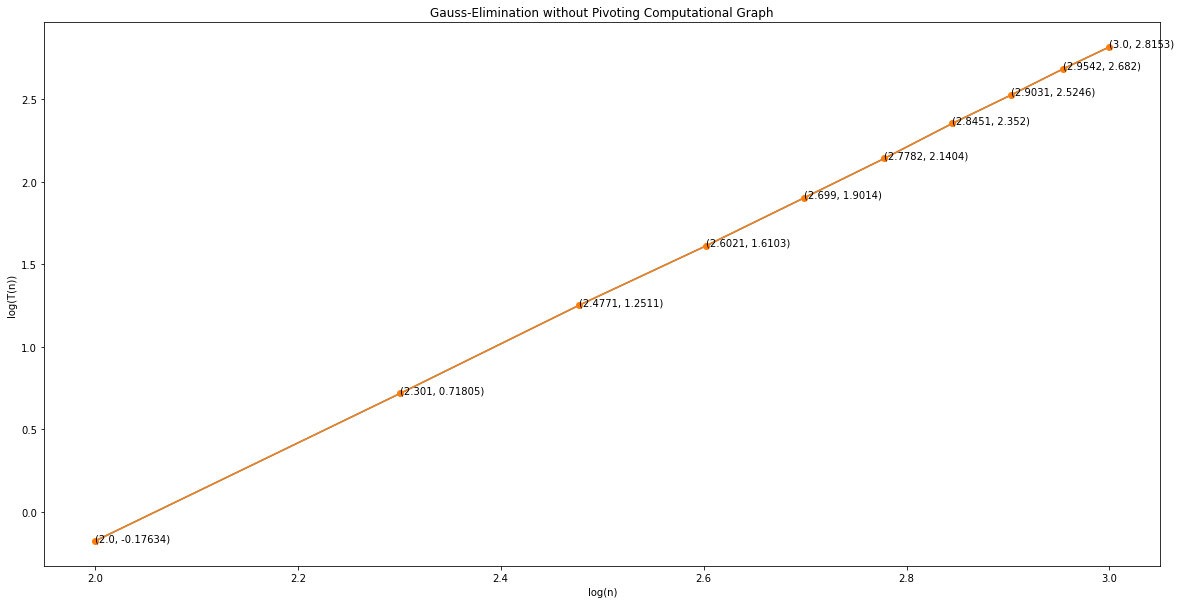

In [108]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

fig1 = sns.lineplot(data=genptt_df, x="n", y="time", markers=True)
for i in range(len(log_n)):
    ax.text(log_n[i], log_genptt[i], f"{log_n[i], log_genptt[i]}")
plt.plot(log_n, log_genptt, "-o")
fig1.set(xlabel='log(n)', ylabel='log(T(n))')
plt.title("Gauss-Elimination without Pivoting Computational Graph")
plt.savefig("genp_plot.png", dpi=300, transparent=True)

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gepptt_df['n'],gepptt_df['time'])

In [41]:
slope, intercept, r_value, p_value, std_err

(2.9944732270952574,
 -6.490015001700463,
 0.9999583142993189,
 1.3210058953367246e-17,
 0.009667130247447642)

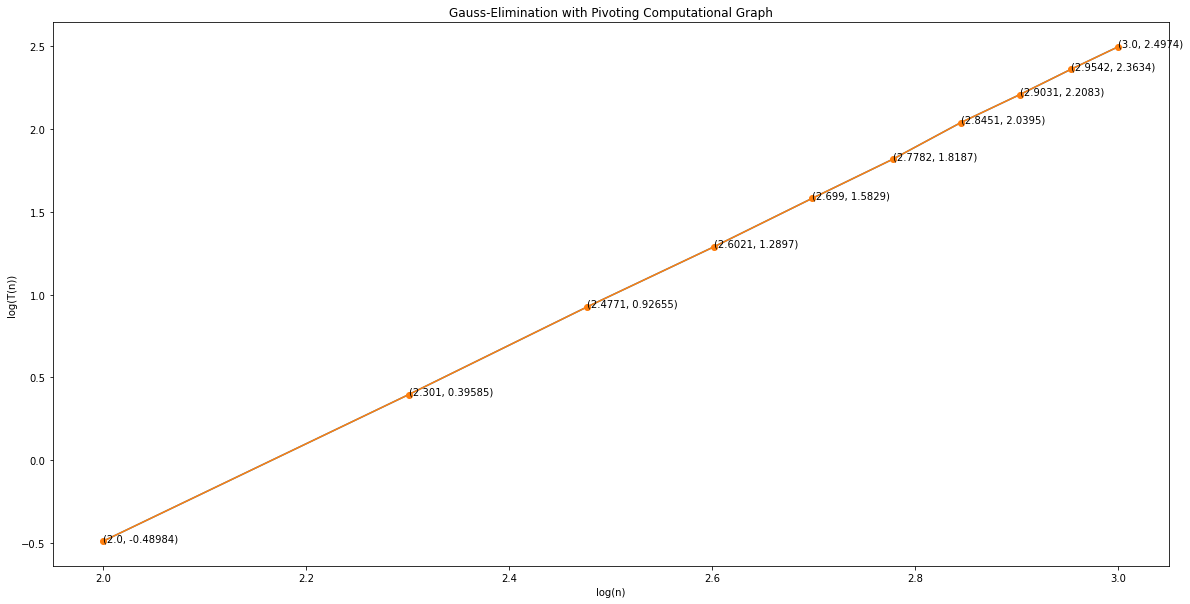

In [112]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

fig1 = sns.lineplot(data=gepptt_df, x="n", y="time", markers=True)
for i in range(len(log_n)):
    ax.text(log_n[i], log_gepptt[i], f"{log_n[i], log_gepptt[i]}")
plt.plot(log_n, log_gepptt, "-o")
fig1.set(xlabel='log(n)', ylabel='log(T(n))')
plt.title("Gauss-Elimination with Pivoting Computational Graph")
plt.savefig("gepp_plot.png", dpi=300, transparent=True)

## Q2) Implementing Gauss Seidel and Gauss Jacobi Methods

(i) Write a function to check whether a given square matrix is diagonally dominant or not. If not, the function should
indicate if the matrix can be made diagonally dominant by interchanging the rows? Code to be written and submitted. (1)

      Deliverable(s): The code
      
-----------------------------------------------------------------------------------------------------------------------

In [2]:
def is_diagonally_dominant(mat, size):
    for row_idx in range(size):
        row_sum = 0
        [row_sum := row_sum + abs(elm) for elm in mat[row_idx]]
        dia_val = abs(mat[row_idx][row_idx])
        if (row_sum - dia_val) > dia_val:
            return False
    return True

In [3]:
def is_diagonally_dominant_after_row_ops(mat, size):
    max_row_vals, max_row_idxs, row_sums = [], [], []
    for row_idx in range(size):
        max_val, max_idx, row_sum = -1, -1, 0
        for col_idx in range(size):
            elm = abs(mat[row_idx][col_idx])
            row_sum = row_sum + elm
            if elm > max_val:
                max_val, max_idx = elm, col_idx
        max_row_vals.append(max_val)
        max_row_idxs.append(max_idx)
        row_sums.append(row_sum)
    
    #copy_max_row_idxs = [x for x in max_row_idxs]
    max_row_idxs.sort()
    if all([True if max_row_vals[x] >= (row_sums[x] - max_row_vals[x]) else False for x in range(size)]) and all([True if max_row_idxs[x] == x else False for x in range(size)]):
        #rearrange_order = [x for x,y in sorted(enumerate(copy_max_row_idxs), key = lambda x: x[1])]
        #for k in rearrange_order:
            #print(mat[k])
        return True
    else:
        return False

In [4]:
def diagonally_dominant_analysis(mat):
    size = len(mat)
    
    dd_status = is_diagonally_dominant(mat, size)
    print(f"Is matrix diagonally dominant?: {dd_status}")
    
    if not dd_status:
        print(f"Is matrix can be made diagonally dominant by interchanging the rows?: {is_diagonally_dominant_after_row_ops(mat, size)}")

In [5]:
# Test1
m = [[ 3, -2, 1 ],
    [ 0, -3, 3 ],
    [ -1, 2, 4 ]]
diagonally_dominant_analysis(m)

Is matrix diagonally dominant?: True


In [6]:
# Test2
m = [[ -8, 1, 45 ],
    [ 14, 9, 2 ],
    [ 3, 10, -4 ]]
diagonally_dominant_analysis(m)

Is matrix diagonally dominant?: False
Is matrix can be made diagonally dominant by interchanging the rows?: True


(ii) Write a function to generate Gauss Seidel iteration for a given square matrix. The function should also return the
values of 1, ∞ and Frobenius norms of the iteration matrix. Generate a random 4 ×4 matrix. Report the iteration matrix
and its norm values returned by the function along with the input matrix. (1)

          Deliverable(s): The input matrix, iteration matrix and the three norms obtained
        
-----------------------------------------------------------------------------------------------------------------------

In [7]:
def transpose_matrix(m):
    return [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))]

In [8]:
def matrix_minor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

In [9]:
def matrix_deternminant(m):
    # base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0]*m[1][1]-m[0][1]*m[1][0]

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0][c]*matrix_deternminant(matrix_minor(m,0,c))
    return determinant

In [10]:
def matrix_inverse(m):
    determinant = matrix_deternminant(m)
    # special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1][1]/determinant, -1*m[0][1]/determinant],
                [-1*m[1][0]/determinant, m[0][0]/determinant]]

    # find matrix of cofactors
    cofactors = []
    for r in range(len(m)):
        cofactor_row = []
        for c in range(len(m)):
            minor = matrix_minor(m,r,c)
            cofactor_row.append(((-1)**(r+c)) * matrix_deternminant(minor))
        cofactors.append(cofactor_row)
    cofactors = transpose_matrix(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors

In [11]:
# Test1
m = [[4, -2, 1], [5, 0, 3], [-1, 2, 6]]
matrix_inverse(m)

[[-0.11538461538461539, 0.2692307692307692, -0.11538461538461539],
 [-0.6346153846153846, 0.4807692307692308, -0.1346153846153846],
 [0.19230769230769232, -0.11538461538461539, 0.19230769230769232]]

In [12]:
def multiply_matrix(m1, m2):
    result = [[0 for j in range(len(m2[0]))] for i in range(len(m1))]
    
    # iterate through rows of m1
    for i in range(len(m1)):
        # iterate through columns of m2
        for j in range(len(m2[0])):
            # iterate through rows of m2
            for k in range(len(m2)):
                result[i][j] += m1[i][k] * m2[k][j]
    return result

In [13]:
def norm_1(m):
    colmax = 0
    for c in range(len(m[0])):
        temp = 0
        for r in range(len(m)):
            temp = temp + abs(m[r][c])
        if temp > colmax:
            colmax = temp
    return colmax

In [14]:
#test1
m = [[5, -4, 2], [-1, 2, 3], [-2, 1, 0]]
norm_1(m)

8

In [15]:
def norm_infinity(m):
    rowmax = 0
    for r in range(len(m)):
        temp = 0
        for c in range(len(m[r])):
            temp = temp + abs(m[r][c])
        if temp > rowmax:
            rowmax = temp
    return rowmax

In [16]:
#test1
m = [[5, -4, 2], [-1, 2, 3], [-2, 1, 0]]
norm_infinity(m)

11

In [17]:
def norm_frobenius(m):
    sqr_sum = 0
    for r in range(len(m)):
        for c in range(len(m[r])):
            elm = abs(m[r][c])
            sqr_sum = sqr_sum + (elm ** 2)
    return sqrt(sqr_sum)

In [18]:
#test1
m = [[5, -4, 2], [-1, 2, 3], [-2, 1, 0]]
norm_frobenius(m)

8.0

In [19]:
def vector_norm_2(v):
    sqr_sum = 0
    for elm in v:
        abs_elm = abs(elm)
        sqr_sum = sqr_sum + abs_elm ** 2
    return sqrt(sqr_sum)

In [20]:
#test1
m = [5, -4, 2]
vector_norm_2(m)

6.708203932499369

In [21]:
def define_equations(a_row, b_row_val, x_col, row_idx, n):
    '''
    This method will generate the equation for each row.
    input:
          a_row: row in matrix a size 1 x n.
          b_row_val: row value in matrix b.
          x_col: vector x of size n x 1.
    '''
    rhs = 0
    for i in range(0, n):
        if i != row_idx:
            rhs = rhs + a_row[i] * x_col[i]
    x_col[row_idx] = (b_row_val - rhs) / a_row[row_idx]
    return x_col

In [35]:
def gauss_seidel_analysis(a, b, x, epsilon):
    condition = True
    n = len(a)
    x_old = [i for i in x]
    
    i_add_l = [[a[i][j] if j <=i else 0 for j in range(n)] for i in range(n)]
    u = [[0 if j<=i else a[i][j] for j in range(n)] for i in range(n)]
    inverse_i_add_l = matrix_inverse(i_add_l)
    iteration_matrix = multiply_matrix(inverse_i_add_l, u)
    negative_iteration_matrix = [[-elm if elm !=0 else 0.0 for elm in iteration_matrix_row] for iteration_matrix_row in iteration_matrix]
    first_norm = norm_1(negative_iteration_matrix)
    infi_norm = norm_infinity(negative_iteration_matrix)
    frob_norm = norm_frobenius(negative_iteration_matrix)
    
    while condition:
        for i in range(n):
            define_equations(a[i], b[i], x, i, n)
        # Check for convergence
        if all([False if abs(x_old[j] - x[j]) > epsilon else True for j in range(n)]):
            condition = False
        x_old = [j for j in x]
    return x, first_norm, infi_norm, frob_norm, negative_iteration_matrix

In [36]:
# Test1
x = [0, 0, 0]                        
a = [[4, 1, 2],[3, 5, 1],[1, 1, 3]]
b = [4,7,3]
print(gauss_seidel_analysis(a, b, x, 0.1))

([0.52, 0.992, 0.496], 0.7333333333333333, 0.75, 0.6032320356951286, [[0.0, -0.25, -0.5], [0.0, 0.15, 0.09999999999999998], [0.0, 0.03333333333333333, 0.13333333333333333]])


In [37]:
# Test2
x = [0, 0]                        
a = [[16, 3],[7, -11]]
b = [11, 13]
print(gauss_seidel_analysis(a, b, x, 0))

([0.8121827411167513, -0.6649746192893401], 0.3068181818181818, 0.1875, 0.22224553654099938, [[0.0, -0.1875], [0.0, -0.11931818181818182]])


In [38]:
# Test3
x = [0, 0]                        
a = [[2, 1],[3, 7]]
b = [4, 3]
print(gauss_seidel_analysis(a, b, x, 0))

([2.2727272727272725, -0.5454545454545453], 0.7142857142857143, 0.5, 0.5439837932759934, [[0.0, -0.5], [0.0, 0.21428571428571427]])


In [39]:
# Test3
x = [1, 1, 1]                        
a = [[5,-1,3],[-3,9,1],[2,-1,-7]]
b = [-3,5,7] 
print(gauss_seidel_analysis(a, b, x, 0))

([0.17857142857142855, 0.7321428571428572, -1.0535714285714286], 1.0380952380952382, 0.8, 0.7208516561008241, [[0.0, 0.2, -0.6000000000000001], [0.0, 0.06666666666666667, -0.3111111111111111], [0.0, 0.047619047619047616, -0.12698412698412698]])


In [40]:
# Test4
x = [0, 0, 0, 0]                        
a = [[10, -1, 2, 0],
     [-1, 11, -1, 3],
     [2, -1, 10, -1],
     [0, 3, -1, 8]]
b = [6.0, 25.0, -11.0, 15.0]
solution, norm1, norminfi, normfrob, itr_matrix = gauss_seidel_analysis(a, b, x, 0)
print(f"Solution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nIteration Matrix: {itr_matrix}\n")

Solution: [1.0, 2.0, -1.0, 1.0]
Norm 1: 0.4568181818181818
Norm Infinity: 0.3545454545454545
Norm Frobenius: 0.3879849837609272
Iteration Matrix: [[0.0, 0.1, -0.2, 0.0], [0.0, 0.00909090909090909, 0.07272727272727272, -0.2727272727272727], [0.0, -0.019090909090909092, 0.04727272727272727, 0.07272727272727274], [0.0, -0.0057954545454545455, -0.021363636363636362, 0.11136363636363635]]



In [170]:
import math
condition = True
count = 1
while condition:
    print(count, end="\r")
    count = count + 1
    n = 4
    x = [0 for i in range(n)]
    #a = [[tidy(random.uniform(-5.0000, 9.9999), 5) for i in range(n)] for j in range(n)]
    #b = [tidy(random.uniform(0.10000, 5.0000), 5) for j in range(n)]
    a = [[random.randint(-9, 9) for i in range(n)] for j in range(n)]
    b = [random.randint(-9, 9) for j in range(n)]
    solution, norm1, norminfi, normfrob, itr_matrix = gauss_seidel_analysis(a, b, x, 0)
    #print(f"Input Matrix a: {a}\nInput Vector b: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nIteration Matrix: {itr_matrix}\n")
    if all([False if math.isnan(elm) else True for elm in solution]):
        condition = False
        print(f"Input Matrix a: {a}\nInput Vector b: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nIteration Matrix: {itr_matrix}\n")

Input Matrix a: [[-7, -8, 4, -3], [1, -5, 3, -1], [9, -8, -9, 0], [-1, 7, 2, 4]]
Input Vector b: [8, 7, 4, -1]
Solution: [0.038004750593824355, -1.2802850356294535, 0.7315914489311164, 1.6342042755344415]
Norm 1: 2.895238095238095
Norm Infinity: 2.142857142857143
Norm Frobenius: 2.2596822832345307
Iteration Matrix: [[0.0, -1.1428571428571428, 0.5714285714285714, -0.42857142857142855], [0.0, -0.22857142857142856, 0.7142857142857144, -0.2857142857142857], [0.0, -0.9396825396825397, -0.06349206349206349, -0.17460317460317457], [0.0, 0.5841269841269842, -1.0753968253968256, 0.4801587301587302]]



In [175]:
for i in range(4):
    print([tidy(elm, 5) for elm in itr_matrix[i]])

[0.0, -1.1429, 0.57143, -0.42857]
[0.0, -0.22857, 0.71429, -0.28571]
[0.0, -0.93968, -0.063492, -0.1746]
[0.0, 0.58413, -1.0754, 0.48016]


(iii) Repeat part (ii) for the Gauss Jacobi iteration. (1)
            
            Deliverable(s): The input matrix, iteration matrix and the three norms obtained
            
-----------------------------------------------------------------------------------------------------------------------

In [180]:
def gauss_jacobi_analysis(a, b, x, epsilon):
    condition = True
    n = len(a)
    x_old = [i for i in x]
    x_new = [i for i in x]
    
    l_add_u = [[a[i][j] if j !=i else 0 for j in range(n)] for i in range(n)]
    i_mat = [[0 if j!=i else a[i][j] for j in range(n)] for i in range(n)]
    inverse_i = matrix_inverse(i_mat)
    negative_inverse_i = [[-elm for elm in inverse_i_row] for inverse_i_row in inverse_i]
    iteration_matrix = multiply_matrix(negative_inverse_i, l_add_u)
    first_norm = norm_1(iteration_matrix)
    infi_norm = norm_infinity(iteration_matrix)
    frob_norm = norm_frobenius(iteration_matrix)
    
    while condition:
        for i in range(n):
            x = [k for k in x_old]
            x_new[i] = define_equations(a[i], b[i], x, i, n)[i]
        # Check for convergence
        if all([False if abs(x_old[j] - x_new[j]) > epsilon else True for j in range(n)]):
            condition = False
        x_old = [j for j in x_new]
    return x, first_norm, infi_norm, frob_norm, iteration_matrix

In [181]:
# Test1
x = [0, 0, 0]                        
a = [[20,1,-2],
     [3,20,-1],
     [2,-3,20]]
b = [17, -18, 25] 
print(gauss_jacobi_analysis(a, b, x, 0.00001))

([0.9999995, -0.9999971249999999, 1.00000048125], 0.25, 0.25, 0.2645751311064591, [[0.0, -0.05, 0.1], [-0.15000000000000002, 0.0, 0.05], [-0.1, 0.15000000000000002, 0.0]])


In [182]:
# Test2
x = [0, 0, 0, 0]                        
a = [[10,-1,2,0],
     [-1,11,-1, 3],
     [2,-1,10,-1],
     [0, 3, -1, 8]]
b = [6,25,-11, 15] 
print(gauss_jacobi_analysis(a, b, x, 0.00001))

([0.999998155430544, 2.00000292370118, -1.0000023015887396, 0.9999986159134651], 0.575, 0.5, 0.5976278866561457, [[0.0, 0.1, -0.2, 0.0], [0.09090909090909091, 0.0, 0.09090909090909091, -0.2727272727272727], [-0.2, 0.1, 0.0, 0.1], [0.0, -0.375, 0.125, 0.0]])


In [224]:
import math
condition = True
count = 1
while condition:
    print(count, end="\r")
    count = count + 1
    n = 4
    x = [0 for i in range(n)]
    #a = [[tidy(random.uniform(-5.0000, 9.9999), 5) for i in range(n)] for j in range(n)]
    #b = [tidy(random.uniform(0.10000, 5.0000), 5) for j in range(n)]
    a = [[random.randint(-20, 30) for i in range(n)] for j in range(n)]
    b = [random.randint(-20, 30) for j in range(n)]
    solution, norm1, norminfi, normfrob, itr_matrix = gauss_jacobi_analysis(a, b, x, 0)
    #print(f"Input Matrix a: {a}\nInput Vector b: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nIteration Matrix: {itr_matrix}\n")
    if all([False if math.isnan(elm) else True for elm in solution]):
        condition = False
        print(f"Input Matrix a: {a}\nInput Vector b: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nIteration Matrix: {itr_matrix}\n")

Input Matrix a: [[-12, 21, 13, 18], [2, 30, -3, 25], [-20, -3, 12, -17], [-8, -8, -3, 28]]
Input Vector b: [-14, 27, 29, -5]
Solution: [inf, inf, inf, inf]
Norm 1: 3.75
Norm Infinity: 4.333333333333333
Norm Frobenius: 3.495277831615307
Iteration Matrix: [[0.0, 1.75, 1.0833333333333333, 1.5], [-0.06666666666666667, 0.0, 0.1, -0.8333333333333334], [1.6666666666666665, 0.25, 0.0, 1.4166666666666665], [0.2857142857142857, 0.2857142857142857, 0.10714285714285714, 0.0]]



In [225]:
for i in range(4):
    print([tidy(elm, 5) for elm in itr_matrix[i]])

[0.0, 1.75, 1.0833, 1.5]
[-0.066667, 0.0, 0.1, -0.83333]
[1.6667, 0.25, 0.0, 1.4167]
[0.28571, 0.28571, 0.10714, 0.0]


(iv) Write a function that perform Gauss Seidel iterations. Generate a random 4 × 4 matrix A and a suitable random 
vector b ∈ R4 and report the results of passing this matrix to the functions written above.Write down the first ten 
iterates of Gauss Seidel algorithm. Does it converge? Generate a plot of ∥xk+1 −xk∥2 for the first 10 iterations.
Take a screenshot and paste it in the assignment document. (1)
       
           Deliverable(s): The input matrix and the vector, the 10 successive iterates and the plot

-----------------------------------------------------------------------------------------------------------------------

In [339]:
def gauss_seidel_analysis_with_itr_limit(a, b, x, epsilon, itr):
    condition = True
    has_converged = False
    n = len(a)
    x_old = [i for i in x]
    
    i_add_l = [[a[i][j] if j <=i else 0 for j in range(n)] for i in range(n)]
    u = [[0 if j<=i else a[i][j] for j in range(n)] for i in range(n)]
    inverse_i_add_l = matrix_inverse(i_add_l)
    iteration_matrix = multiply_matrix(inverse_i_add_l, u)
    negative_iteration_matrix = [[-elm for elm in iteration_matrix_row] for iteration_matrix_row in iteration_matrix]
    first_norm = norm_1(negative_iteration_matrix)
    infi_norm = norm_infinity(negative_iteration_matrix)
    frob_norm = norm_frobenius(negative_iteration_matrix)
    
    count = 0
    norm_errors = []
    itr_values = []
    while condition:
        for i in range(n):
            define_equations(a[i], b[i], x, i, n)
        itr_values.append([elm for elm in x])
        # Check for convergence
        if all([False if abs(x_old[j] - x[j]) > epsilon else True for j in range(n)]):
            condition = False
            has_converged = True
        error = [x_old[k] - x[k] for k in range(len(x))]
        norm_errors.append(vector_norm_2(error))
        x_old = [j for j in x]
        count = count + 1
        if count == itr:
            condition = False
    return x, first_norm, infi_norm, frob_norm, norm_errors, has_converged, itr_values

In [340]:
# Test1
x = [0, 0, 0, 0]                        
a = [[10, -1, 2, 0],
     [-1, 11, -1, 3],
     [2, -1, 10, -1],
     [0, 3, -1, 8]]
b = [6.0, 25.0, -11.0, 15.0]
solution, norm1, norminfi, normfrob, normalized_errors, converged, itr_val = gauss_seidel_analysis_with_itr_limit(a, b, x, 0, 10)
print(f"Solution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nerror_l2_norm: {normalized_errors}\nHas Converged: {converged}\nItr Values: {itr_val}\n")

Solution: [0.9999999999868117, 1.9999999998595697, -0.9999999999763907, 1.0000000000556126]
Norm 1: 0.4568181818181818
Norm Infinity: 0.3545454545454545
Norm Frobenius: 0.3879849837609272
error_l2_norm: [2.742864757228523, 0.5302971831879821, 0.044830810568892175, 0.007109620693563844, 0.0008743589512860802, 9.062087893690517e-05, 8.219392165061605e-06, 6.539341072741501e-07, 4.4233701694032134e-08, 2.3482754714404746e-09]
Has Converged: False
Itr Values: [[0.6, 2.3272727272727276, -0.9872727272727273, 0.8788636363636363], [1.0301818181818183, 2.0369380165289255, -1.0144561983471074, 0.9843412190082644], [1.006585041322314, 2.003555016904583, -1.002527384673178, 0.9983509455766342], [1.000860978625094, 2.000298250656547, -1.0003072761017007, 0.9998497464910823], [1.000091280285995, 2.000021342246459, -1.0000311471834449, 0.9999881032596473], [1.0000083636613348, 2.000001173336268, -1.0000027450726754, 0.9999992168648151], [1.000000666348162, 2.0000000246073673, -1.000000209122414, 0.99

In [341]:
# Test1
x = [0, 0, 0, 0]                        
a = [[2, -4, -4, 2], [1, 5, 2, 4], [-1, 2, 2, -2], [3, -2, 5, 4]]
b = [1, -3, -2, 2]
solution, norm1, norminfi, normfrob, normalized_errors, converged, itr_val = gauss_seidel_analysis_with_itr_limit(a, b, x, 0, 10)
print(f"Solution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nerror_l2_norm: {normalized_errors}\nHas Converged: {converged}\nItr Values: {itr_val}\n")

Solution: [9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656]
Norm 1: 8.75
Norm Infinity: 8.525
Norm Frobenius: 6.822801843817539
error_l2_norm: [0.8768729953647791, 3.348294823138525, 4.865446327058476, 4.990333108893301, 6.88385473655486, 7.729420905528896, 10.913752234736602, 12.069179680972548, 17.092823839455022, 18.856920411817523]
Has Converged: False
Itr Values: [[0.5, -0.7, -0.050000000000000044, -0.16249999999999987], [-0.8375000000000001, -0.2825000000000001, -1.2987499999999998, 2.6103125], [-5.2728125, -1.1141875000000003, 0.08809375000000053, 3.787398437499999], [-5.339585937499999, -2.5972390624999995, 2.714844531249999, -0.1874857421874987], [0.9226966796874976, -1.7204885546875002, 0.99435115234375, -2.2952057275390607], [1.3429309228515605, 0.5698379365234365, -3.1935782026367168, 3.769693529418944], [-8.517174061645505, -0.6348887301513674, -0.8540047712524412, 7.637942145223997], [-10.115729148031615, -4.345605978071898, 5.9256835492800874,

In [333]:
import math
condition = True
count = 1
while condition:
    print(count, end="\r")
    count = count + 1
    n = 4
    x = [0 for i in range(n)]
    #a = [[tidy(random.uniform(-5.0000, 9.9999), 5) for i in range(n)] for j in range(n)]
    #b = [tidy(random.uniform(0.10000, 5.0000), 5) for j in range(n)]
    a = [[random.randint(-5, 5) for i in range(n)] for j in range(n)]
    b = [random.randint(-5, 5) for j in range(n)]
    solution, norm1, norminfi, normfrob, normalized_errors, converged, itr_val = gauss_seidel_analysis_with_itr_limit(a, b, x, 0, 10)
    #print(f"Input Matrix a: {a}\nInput Vector b: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nIteration Matrix: {itr_matrix}\n")
    if all([False if math.isnan(elm) else True for elm in solution]):
        condition = False
print(f"A: {a}\nb: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nerror_l2_norm: {normalized_errors}\nHas Converged: {converged}\nItr Values: {itr_val}\n")

A: [[2, -4, -4, 2], [1, 5, 2, 4], [-1, 2, 2, -2], [3, -2, 5, 4]]
b: [1, -3, -2, 2]
Solution: [9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656]
Norm 1: 8.75
Norm Infinity: 8.525
Norm Frobenius: 6.822801843817539
error_l2_norm: [0.8768729953647791, 3.348294823138525, 4.865446327058476, 4.990333108893301, 6.88385473655486, 7.729420905528896, 10.913752234736602, 12.069179680972548, 17.092823839455022, 18.856920411817523]
Has Converged: False
Itr Values: [[9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656], [9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656], [9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656], [9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656], [9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656], [9.047663410701926, 3.138978224845963, -7.995765352392895, 5.278448244887656], [9.047663410701926, 3.138978224845963, -7.9

In [343]:
for z in range(10):
    print([tidy(elm, 5) for elm in itr_val[z]])

[0.5, -0.7, -0.05, -0.1625]
[-0.8375, -0.2825, -1.2987, 2.6103]
[-5.2728, -1.1142, 0.088094, 3.7874]
[-5.3396, -2.5972, 2.7148, -0.18749]
[0.9227, -1.7205, 0.99435, -2.2952]
[1.3429, 0.56984, -3.1936, 3.7697]
[-8.5172, -0.63489, -0.854, 7.6379]
[-10.116, -4.3456, 5.9257, -1.4931]
[5.1533, -2.8064, 2.89, -8.3806]
[9.0477, 3.139, -7.9958, 5.2784]


In [344]:
error_l2_norm_ = [tidy(i, 5) for i in normalized_errors]
itr = [i for i in range(1,11)]
el2norm_dict = {'iteration': itr, '∥Xk+1 − Xk∥2': error_l2_norm_}   
el2norm_df = pd.DataFrame(el2norm_dict)

In [345]:
el2norm_df

,iteration,∥Xk+1 − Xk∥2
0,1,0.87687
1,2,3.34830
2,3,4.86540
3,4,4.99030
4,5,6.88390
5,6,7.72940
6,7,10.91400
7,8,12.06900
8,9,17.09300
9,10,18.85700


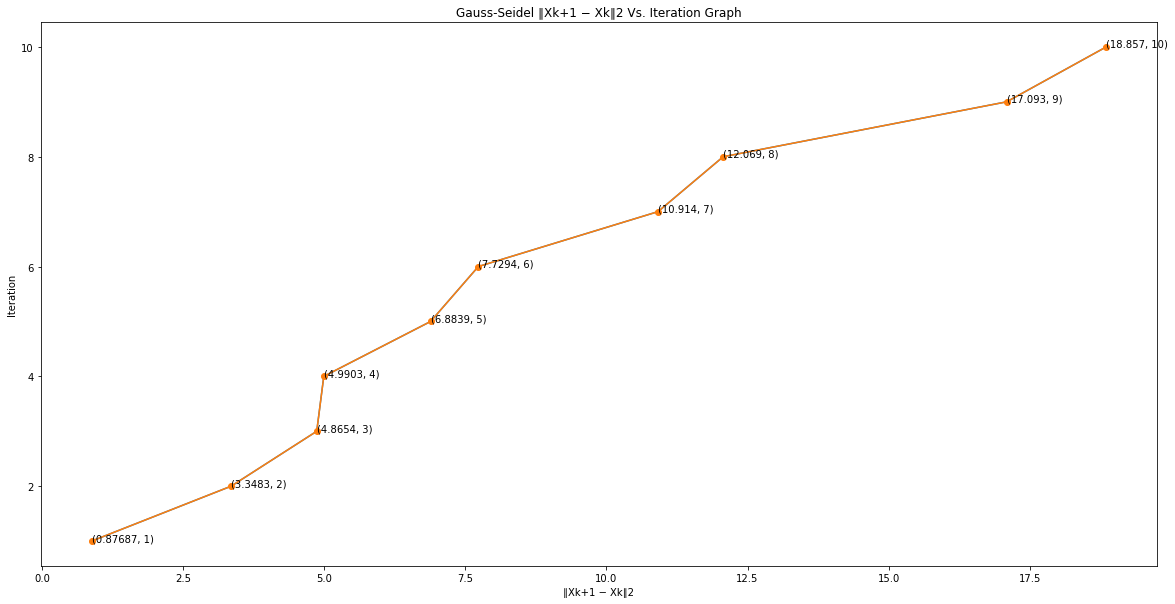

In [346]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

fig1 = sns.lineplot(data=el2norm_df, y="iteration", x="∥Xk+1 − Xk∥2", markers=True)
for i in range(len(itr)):
    ax.text(error_l2_norm_[i], itr[i], f"{error_l2_norm_[i], itr[i]}")
plt.plot(error_l2_norm_, itr, "-o")
fig1.set(ylabel='Iteration', xlabel='∥Xk+1 − Xk∥2')
plt.title("Gauss-Seidel ∥Xk+1 − Xk∥2 Vs. Iteration Graph")
plt.savefig("gs_plot.png", dpi=300, transparent=True)

(v) Repeat part (iv) for the Gauss Jacobi method. (1)

    Deliverable(s): The input matrix and the vector, the 10 successive iterates and the plot

-----------------------------------------------------------------------------------------------------------------------

In [356]:
def gauss_jacobi_analysis_with_itr_limit(a, b, x, epsilon, itr):
    condition = True
    has_converged = False
    n = len(a)
    x_old = [i for i in x]
    x_new = [i for i in x]
    
    l_add_u = [[a[i][j] if j !=i else 0 for j in range(n)] for i in range(n)]
    i_mat = [[0 if j!=i else a[i][j] for j in range(n)] for i in range(n)]
    inverse_i = matrix_inverse(i_mat)
    negative_inverse_i = [[-elm for elm in inverse_i_row] for inverse_i_row in inverse_i]
    iteration_matrix = multiply_matrix(negative_inverse_i, l_add_u)
    first_norm = norm_1(iteration_matrix)
    infi_norm = norm_infinity(iteration_matrix)
    frob_norm = norm_frobenius(iteration_matrix)
    
    count = 0
    norm_errors = []
    itr_values = []
    while condition:
        for i in range(n):
            x = [k for k in x_old]
            x_new[i] = define_equations(a[i], b[i], x, i, n)[i]
        itr_values.append([elm for elm in x_new])
        # Check for convergence
        if all([False if abs(x_old[j] - x_new[j]) > epsilon else True for j in range(n)]):
            condition = False
            has_converged = True
        error = [x_old[k] - x_new[k] for k in range(len(x_new))]
        norm_errors.append(vector_norm_2(error))
        x_old = [j for j in x_new]
        count = count + 1
        if count == itr:
            condition = False
    return x, first_norm, infi_norm, frob_norm, norm_errors, has_converged, itr_values

In [357]:
# Test1
x = [0, 0, 0, 0]                        
a = [[10,-1,2,0],
     [-1,11,-1, 3],
     [2,-1,10,-1],
     [0, 3, -1, 8]]
b = [6,25,-11, 15] 
solution, norm1, norminfi, normfrob, normalized_errors, converged, itr_val = gauss_jacobi_analysis_with_itr_limit(a, b, x, 0.00001, 10)
print(f"Solution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nerror_l2_norm: {normalized_errors}\nHas Converged: {converged}\nItr Values: {itr_val}\n")

Solution: [0.9996741452148707, 2.0004476715450092, -1.0003691576845712, 0.9997859784600501]
Norm 1: 0.575
Norm Infinity: 0.5
Norm Frobenius: 0.5976278866561457
error_l2_norm: [3.201704898362488, 1.2556434177591917, 0.49690551414887585, 0.2190851701672345, 0.0897453205646942, 0.03927457310200085, 0.01632327649212943, 0.007087147155725075, 0.00297279906969194, 0.0012831613556189962]
Has Converged: False
Itr Values: [[0.6, 2.272727272727273, -1.1, 1.875], [1.0472727272727274, 1.7159090909090908, -0.8052272727272726, 0.8852272727272728], [0.9326363636363636, 2.053305785123967, -1.0493409090909092, 1.1308806818181818], [1.0151987603305785, 1.9536957644628101, -0.9681086260330579, 0.9738427169421487], [0.9889913016528926, 2.0114147257700976, -1.0102859039256198, 1.021350510072314], [1.0031986533621338, 1.9922412606827573, -0.9945217367463373, 0.994433739845511], [0.9981284734175432, 2.00230688155266, -1.0019722306196, 1.0035943101506737], [1.0006251342791859, 1.9986703011223563, -0.999035575

In [364]:
import math
condition = True
count = 1
while condition:
    print(count, end="\r")
    count = count + 1
    n = 4
    x = [0 for i in range(n)]
    #a = [[tidy(random.uniform(-5.0000, 9.9999), 5) for i in range(n)] for j in range(n)]
    #b = [tidy(random.uniform(0.10000, 5.0000), 5) for j in range(n)]
    a = [[random.randint(-9, 9) for i in range(n)] for j in range(n)]
    b = [random.randint(-9, 9) for j in range(n)]
    solution, norm1, norminfi, normfrob, normalized_errors, converged, itr_val = gauss_jacobi_analysis_with_itr_limit(a, b, x, 0, 10)
    #print(f"Input Matrix a: {a}\nInput Vector b: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nNorm Frobenius: {normfrob}\nIteration Matrix: {itr_matrix}\n")
    if all([False if math.isnan(elm) else True for elm in solution]):
        condition = False
        print(f"Input Matrix a: {a}\nInput Vector b: {b}\nSolution: {solution}\nNorm 1: {norm1}\nNorm Infinity: {norminfi}\nFrobenius Norm: {normfrob}\nErrors: {normalized_errors}\nHas Converged: {converged}\nItr Values: {itr_val}\n")

Input Matrix a: [[6, 3, -8, 3], [7, -7, 9, 5], [2, -3, -6, -6], [-5, -2, 1, 1]]
Input Vector b: [-2, 6, -8, 0]
Solution: [859.4828037276083, 220.309924032468, 897.7093041838822, 3840.3245625190953]
Norm 1: 6.333333333333333
Norm Infinity: 8.0
Frobenius Norm: 6.066477906908698
Errors: [1.6197477477804714, 5.394467271927431, 14.463502239121556, 22.123111352169136, 58.32916569159537, 163.00012751231336, 291.3941976587405, 673.6730755483493, 1971.6376632896504, 4179.374403402061]
Has Converged: False
Itr Values: [[-0.3333333333333333, -0.8571428571428571, 1.3333333333333333, 0.0], [1.8730158730158728, 0.523809523809524, 1.650793650793651, -4.7142857142857135], [3.9629629629629632, -0.2290249433106573, 6.410052910052909, 8.761904761904761], [3.9469639707734934, 17.605820105820104, -5.993071302595112, 12.946712018140595], [-23.600361132107167, 4.632095166108775, -19.100634080792815, 60.93953136810279], [-58.58665870816287, -5.487225401624504, -69.78903266185957, -89.63698124752547], [-45.823

In [368]:
for z in range(10):
    print([tidy(elm, 5) for elm in itr_val[z]])

[-0.33333, -0.85714, 1.3333, 0.0]
[1.873, 0.52381, 1.6508, -4.7143]
[3.963, -0.22902, 6.4101, 8.7619]
[3.947, 17.606, -5.9931, 12.947]
[-23.6, 4.6321, -19.101, 60.94]
[-58.587, -5.4872, -69.789, -89.637]
[-45.823, -213.2, 74.185, -234.12]
[322.24, -118.53, 326.78, -729.7]
[859.48, 220.31, 897.71, 1047.4]
[562.78, 2760.9, -869.69, 3840.3]


In [365]:
error_l2_norm_ = [tidy(i, 5) for i in normalized_errors]
itr = [i for i in range(1,11)]
el2norm_dict = {'iteration': itr, '∥Xk+1 − Xk∥2': error_l2_norm_}   
el2norm_df = pd.DataFrame(el2norm_dict)

In [366]:
el2norm_df

,iteration,∥Xk+1 − Xk∥2
0,1,1.6197
1,2,5.3945
2,3,14.4640
3,4,22.1230
4,5,58.3290
5,6,163.0000
6,7,291.3900
7,8,673.6700
8,9,1971.6000
9,10,4179.4000


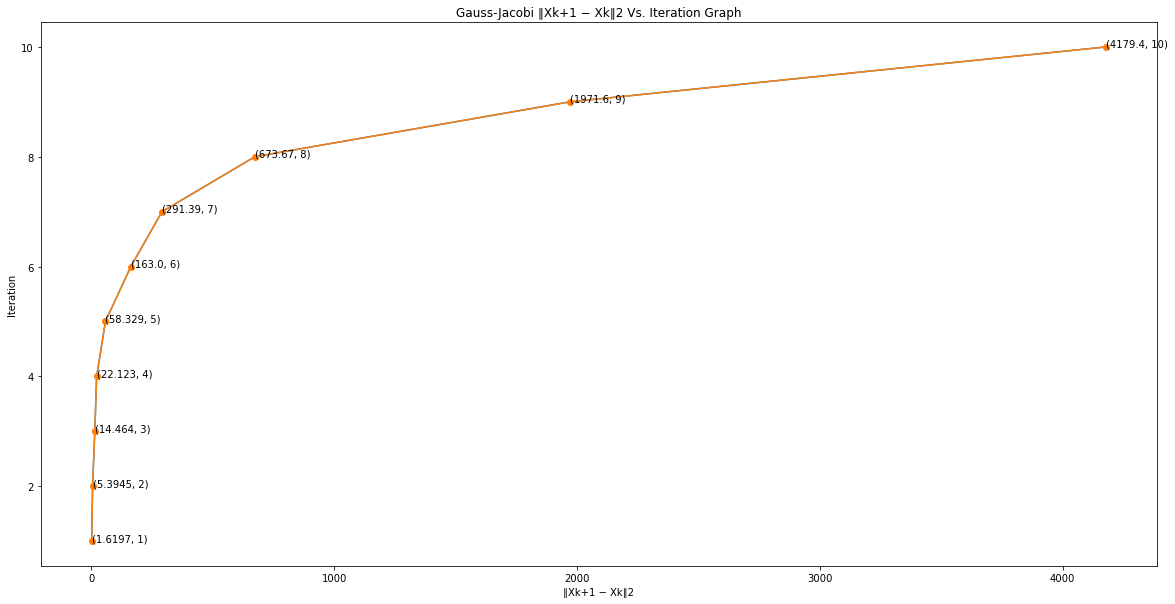

In [367]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

fig1 = sns.lineplot(data=el2norm_df, y="iteration", x="∥Xk+1 − Xk∥2", markers=True)
for i in range(len(itr)):
    ax.text(error_l2_norm_[i], itr[i], f"{error_l2_norm_[i], itr[i]}")
plt.plot(error_l2_norm_, itr, "-o")
fig1.set(ylabel='Iteration', xlabel='∥Xk+1 − Xk∥2')
plt.title("Gauss-Jacobi ∥Xk+1 − Xk∥2 Vs. Iteration Graph")
plt.savefig("gj_plot.png", dpi=300, transparent=True)